In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from scipy.stats import norm,lognorm,chi2_contingency,ttest_ind,ttest_rel,f_oneway,levene ,kruskal
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#reading the data
yulu=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [3]:
yulu.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4105,2011-10-03 02:00:00,4,0,1,1,14.76,18.180,76,7.0015,0,4,4
6630,2012-03-13 13:00:00,1,0,1,1,24.60,30.305,60,26.0027,53,180,233
1301,2011-03-19 02:00:00,1,0,0,2,22.96,26.515,43,15.0013,5,20,25
7540,2012-05-13 13:00:00,2,0,0,1,27.88,31.820,54,16.9979,255,347,602
8134,2012-06-19 07:00:00,2,0,1,2,24.60,28.790,78,8.9981,18,462,480


In [4]:
#metadata of the data
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
#checking null values
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
#statistical description of the data
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<h1>Analysis of count</h1>

<Axes: ylabel='count'>

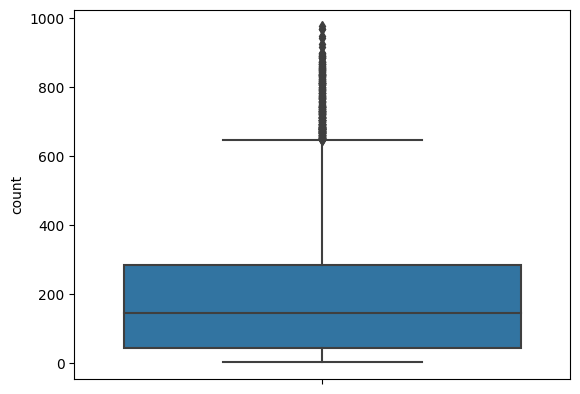

In [7]:
#boxplot
sns.boxplot(data=yulu,y='count')

<h1>Analysis of session</h1>

seasion is a categorical variable here with values 1: spring, 2: summer, 3: fall, 4: winter. So for statistical analysis we will use anova or kruskal in this case.

<h3>Univariate analysis with count</h3>

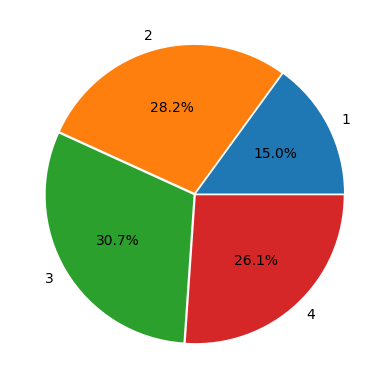

In [8]:
season_yulu=yulu.groupby(['season']).agg({'count':'sum'}).rename(columns={'count':'Count'}).reset_index()
plt.pie(season_yulu['Count'],explode=(0.01,0.01,0.01,0.01), labels=season_yulu['season'],autopct='%.1f%%')
plt.show()


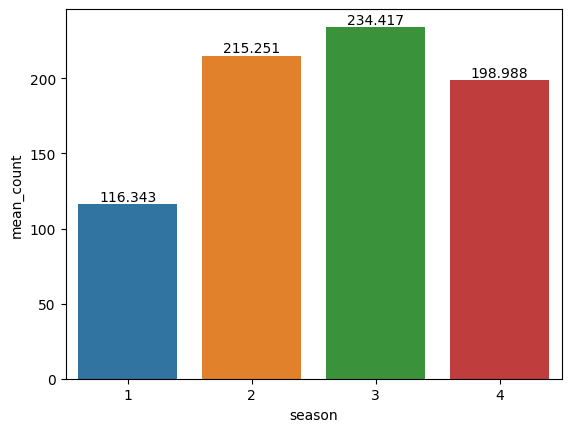

In [9]:
season_yulu_avg=yulu.groupby(['season']).agg({'count':'mean'}).rename(columns={'count':'mean_count'}).reset_index()
ax=sns.barplot(x=season_yulu_avg['season'],y=season_yulu_avg['mean_count'])
ax.bar_label(ax.containers[0])
plt.show()

From this analysis we can seeon an average season 3 has highest copunt where as season 1 has lowest count. But we need to do statistical testing to be sure if this insight is statistically significant.

In [10]:
season_1=yulu[yulu['season']==1]['count']
season_2=yulu[yulu['season']==2]['count']
season_3=yulu[yulu['season']==3]['count']
season_4=yulu[yulu['season']==4]['count']

Assumptions for Anova Test:
*   The samples are independent.
*   Each sample is from a normally distributed population.
*   The population standard deviations of the groups are all equal.






<h4>Let's Test the distribution of each session</h4>

In [11]:
#creating a random normal variable for qq test
normal_rv = norm()

<Axes: title={'center': 'season_4'}, xlabel='count', ylabel='Count'>

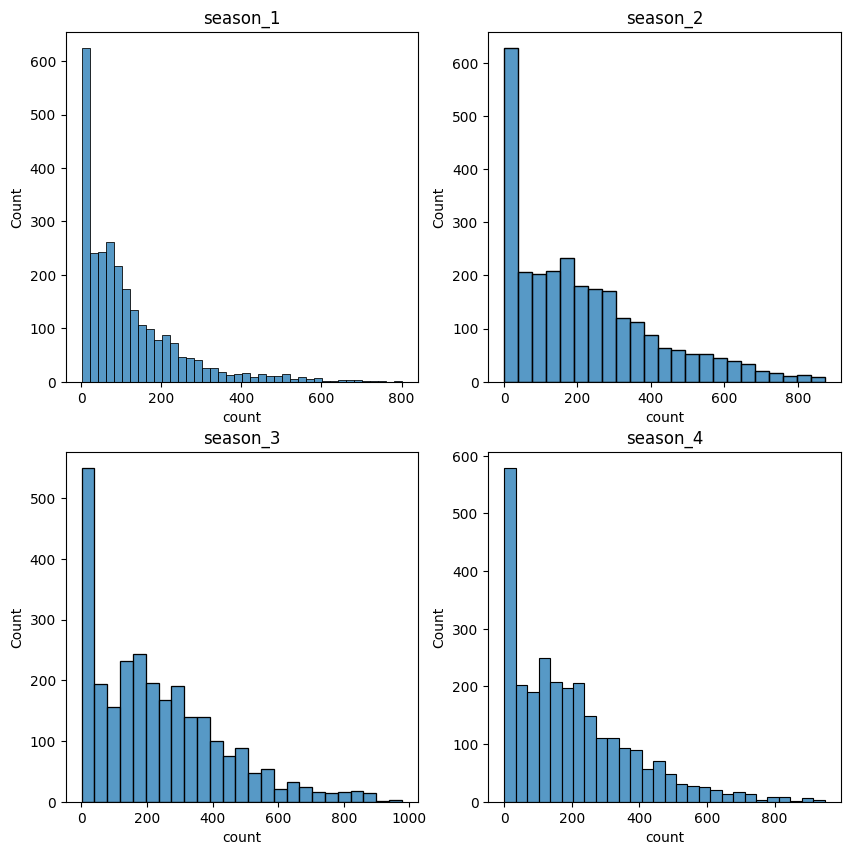

In [12]:
#qqplot
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('season_1')
sns.histplot(ax=axis[0,0],x=season_1)
axis[0,1].set_title('season_2')
sns.histplot(ax=axis[0,1],x=season_2)
axis[1,0].set_title('season_3')
sns.histplot(ax=axis[1,0],x=season_3)
axis[1,1].set_title('season_4')
sns.histplot(ax=axis[1,1],x=season_4)



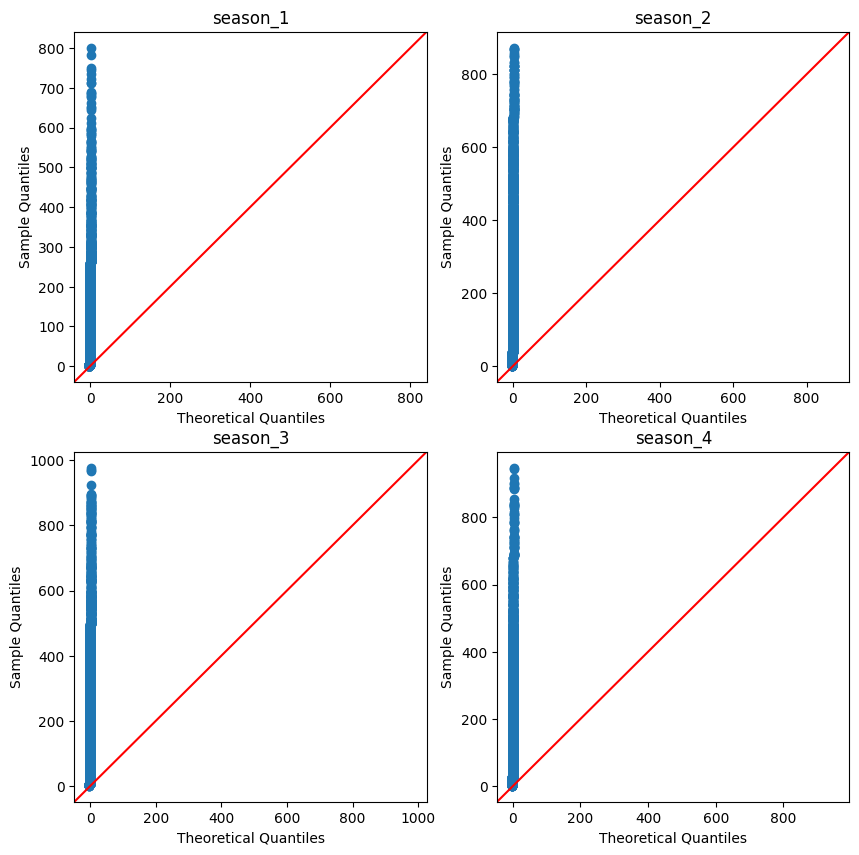

In [13]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('season_1')
sm.qqplot(season_1, line ='45',dist=normal_rv,ax=axis[0,0])
axis[0,1].set_title('season_2')
sm.qqplot(season_2, line ='45',dist=normal_rv,ax=axis[0,1])
axis[1,0].set_title('season_3')
sm.qqplot(season_3, line ='45',dist=normal_rv,ax=axis[1,0])
axis[1,1].set_title('season_4')
sm.qqplot(season_4, line ='45',dist=normal_rv,ax=axis[1,1])
plt.show()

From above analysis we can see season count data is not normally distributed so in this case anova might give wrong result.

<h5>Lets try taking log<h5>

In [14]:
season_1_log=yulu[yulu['season']==1]['count'].apply(lambda x:np.log(x))
season_2_log=yulu[yulu['season']==2]['count'].apply(lambda x:np.log(x))
season_3_log=yulu[yulu['season']==3]['count'].apply(lambda x:np.log(x))
season_4_log=yulu[yulu['season']==4]['count'].apply(lambda x:np.log(x))

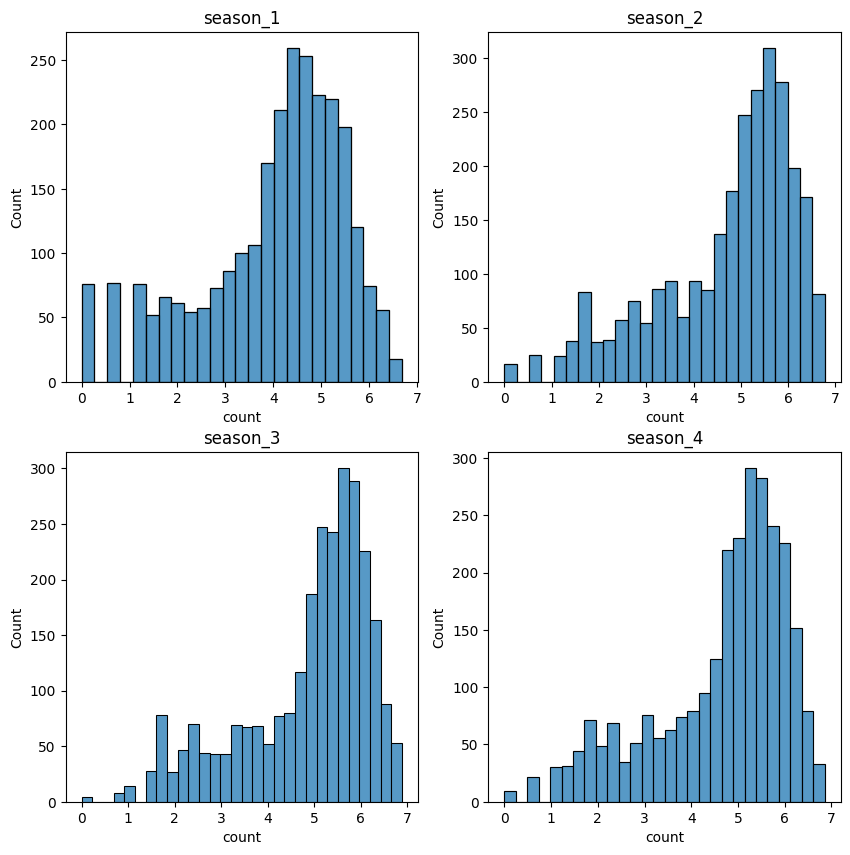

In [15]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('season_1')
sns.histplot(ax=axis[0,0],x=season_1_log)
axis[0,1].set_title('season_2')
sns.histplot(ax=axis[0,1],x=season_2_log)
axis[1,0].set_title('season_3')
sns.histplot(ax=axis[1,0],x=season_3_log)
axis[1,1].set_title('season_4')
sns.histplot(ax=axis[1,1],x=season_4_log)
plt.show()

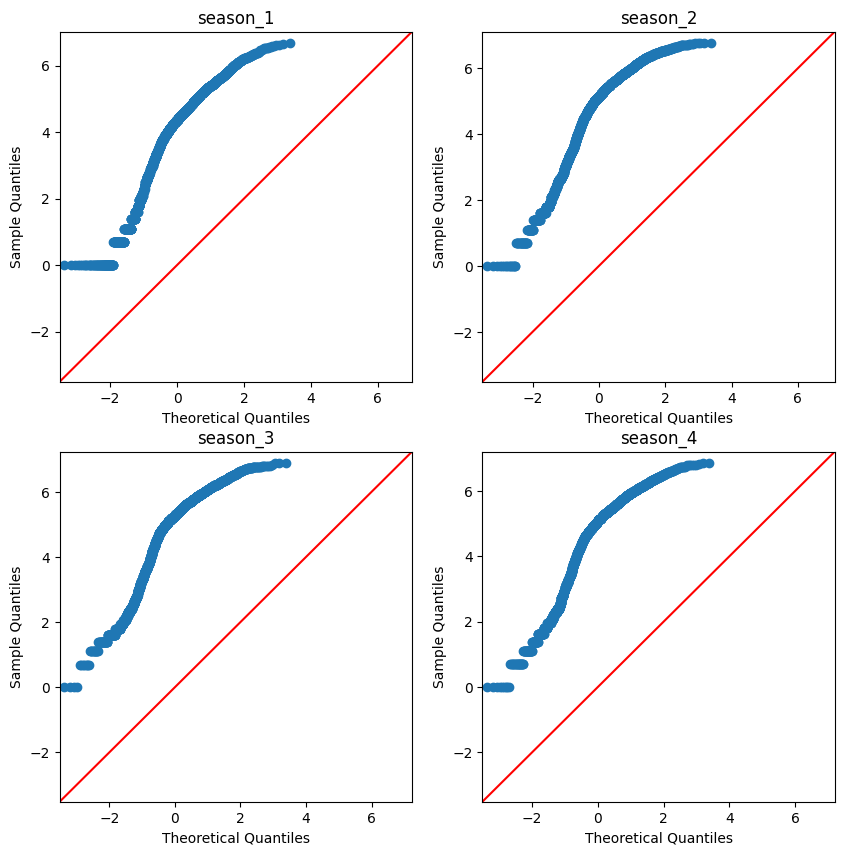

In [16]:
#qqplot
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('season_1')
sm.qqplot(season_1_log, line ='45',dist=normal_rv,ax=axis[0,0])
axis[0,1].set_title('season_2')
sm.qqplot(season_2_log, line ='45',dist=normal_rv,ax=axis[0,1])
axis[1,0].set_title('season_3')
sm.qqplot(season_3_log, line ='45',dist=normal_rv,ax=axis[1,0])
axis[1,1].set_title('season_4')
sm.qqplot(season_4_log, line ='45',dist=normal_rv,ax=axis[1,1])
plt.show()

From above analysis we can see season log count data is also not normally distributed so in this case anova might give wrong result.

<h5>Lets test levene test to test the variance of all the samples</h5>

Null hypothysis: All seasion has same variance<br>
Alternate hypothysis: All seasion has different variance<br>
Let's test with 95% percent confidence interval<br>

In [17]:
stats,prob=levene(season_1,season_2,season_3,season_4)
print("levene statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. All seasion has different variance")
else:
  print("Can not reject Null hypthysis. All seasion has same variance")

levene statistice=  187.7706624026276  Probability=  1.0147116860043298e-118
Reject Null hypthysis. All seasion has different variance


From levene test it is confirmed that variance of each seasons are not same so anova not ablke to give us right probabilty value.

<h3>Statistical Analysis</h3>

**Null hypothysis:** seasion has no impact on count<br>
**Alternate hypothysis:** seasion impacts on count<br>
Let's test with 95% percent confidence interval

In [18]:
#Anova test
stats,prob=f_oneway(season_1,season_2,season_3,season_4)
print("Anova statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. seasion impacts on count")
else:
  print("Can not reject Null hypthysis. seasion has no impact on count")

Anova statistice=  236.94671081032106  Probability=  6.164843386499654e-149
Reject Null hypthysis. seasion impacts on count


In [19]:
#kruskal test
stats,prob=kruskal(season_1,season_2,season_3,season_4)
print("Kruskal statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. seasion impacts on count")
else:
  print("Can not reject Null hypthysis. seasion has no impact on count")

Kruskal statistice=  699.6668548181988  Probability=  2.479008372608633e-151
Reject Null hypthysis. seasion impacts on count


From the both statistical testing it is clear tha season does impact on count of total rental bikes.

<h3>Let's test without the 1st season as it has significantly low average so it might influance overall statistical testing.

In [20]:
#Anova test
stats,prob=f_oneway(season_2,season_3,season_4)
print("Anova statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. seasion impacts on count")
else:
  print("Can not reject Null hypthysis. seasion has no impact on count")

Anova statistice=  24.0395504295829  Probability=  3.892737041581146e-11
Reject Null hypthysis. seasion impacts on count


In [21]:
#kruskal test
stats,prob=kruskal(season_2,season_3,season_4)
print("Kruskal statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. seasion impacts on count")
else:
  print("Can not reject Null hypthysis. seasion has no impact on count")

Kruskal statistice=  44.07072552730397  Probability=  2.6925485630143184e-10
Reject Null hypthysis. seasion impacts on count


So from both the testing we have confirmd that **season impacts the count of total rental bikes** with 95 % confidence

<h1>Analysis of holiday</h1>

Holiday is a categorical variable here with values 1: holiday, 0: not holiday. So for statistical analysis we will use ttest or kruskal.

<h3>Univariate analysis with count</h3>

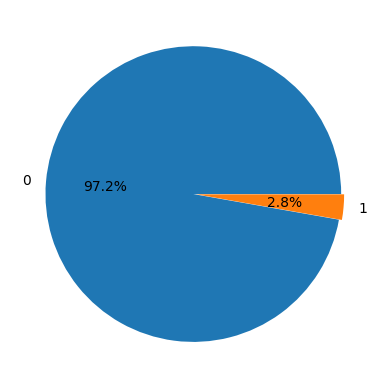

In [22]:
holiday_yulu=yulu.groupby(['holiday']).agg({'count':'sum'}).rename(columns={'count':'Count'}).reset_index()
plt.pie(holiday_yulu['Count'],explode=(0.01,0.01), labels=holiday_yulu['holiday'],autopct='%.1f%%')
plt.show()

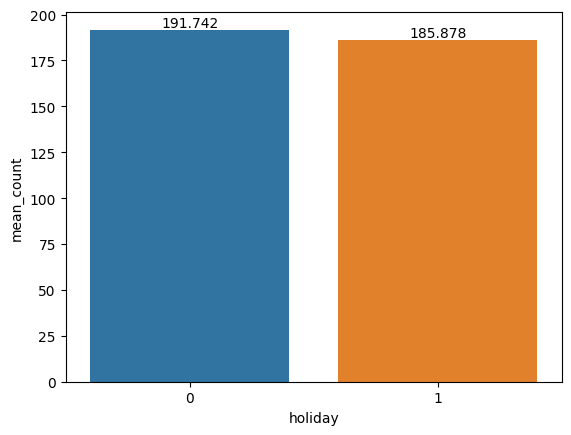

In [23]:
holiday_yulu_avg=yulu.groupby(['holiday']).agg({'count':'mean'}).rename(columns={'count':'mean_count'}).reset_index()
ax=sns.barplot(x=holiday_yulu_avg['holiday'],y=holiday_yulu_avg['mean_count'])
ax.bar_label(ax.containers[0])
plt.show()

From the analysisi we can see on an average non holiday has more count over holidays but to confirm this insight we need to do statistical testing.

In [24]:
holiday=yulu[yulu['holiday']==1]['count']
non_holiday=yulu[yulu['holiday']==0]['count']


Assumptions for ttest:<br>
*   The samples are contous.<br>
*   The population standard deviations of the groups are all equal.<br>






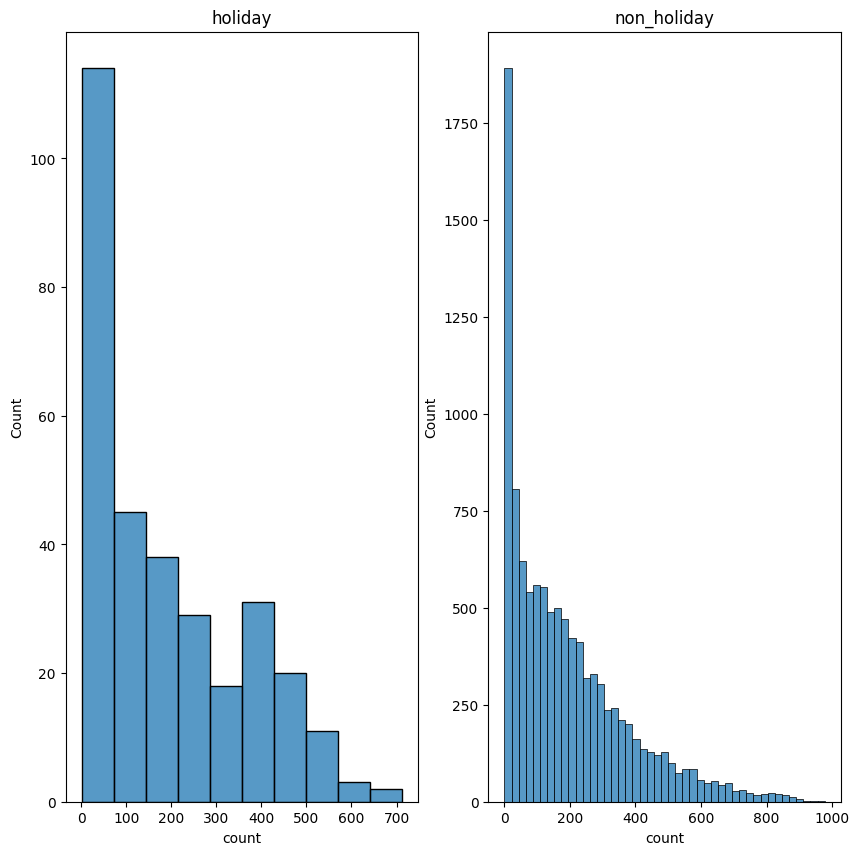

In [25]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('holiday')
sns.histplot(ax=axis[0],x=holiday)
axis[1].set_title('non_holiday')
sns.histplot(ax=axis[1],x=non_holiday)
plt.show()


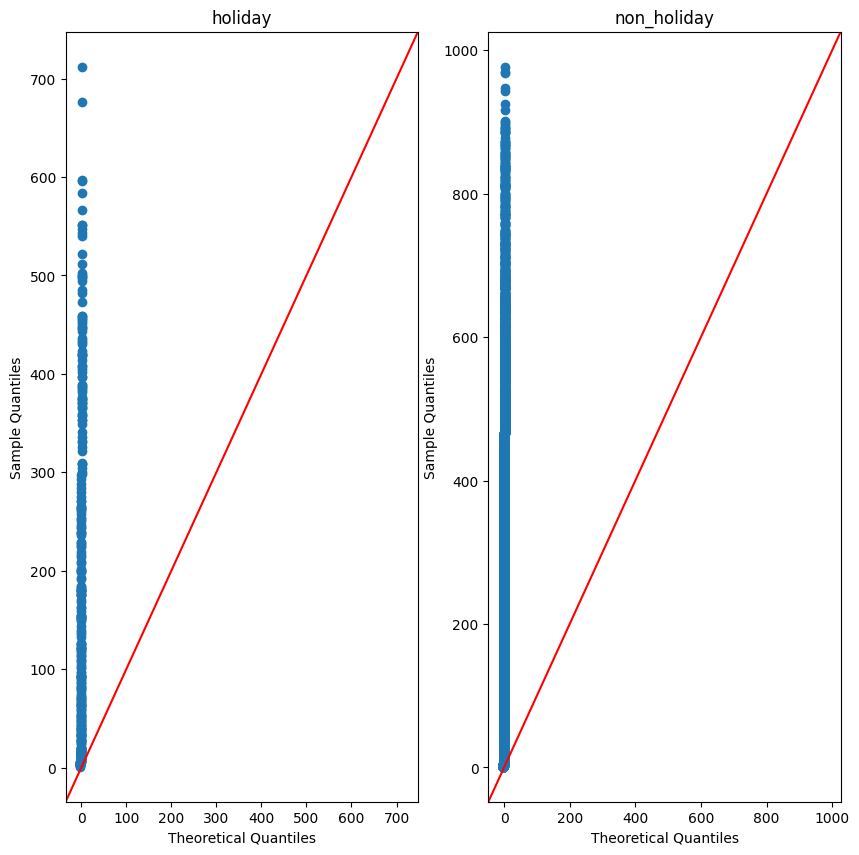

In [26]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('holiday')
sm.qqplot(holiday, line ='45',dist=normal_rv,ax=axis[0])
axis[1].set_title('non_holiday')
sm.qqplot(non_holiday, line ='45',dist=normal_rv,ax=axis[1])
plt.show()

From above analysis we can see holiday count data is not normally distributed so in this case ttest might give wrong result.

<h5>Lets try taking log<h5>

In [27]:
holiday_log=yulu[yulu['holiday']==1]['count'].apply(lambda x:np.log(x))
non_holiday_log=yulu[yulu['holiday']==0]['count'].apply(lambda x:np.log(x))


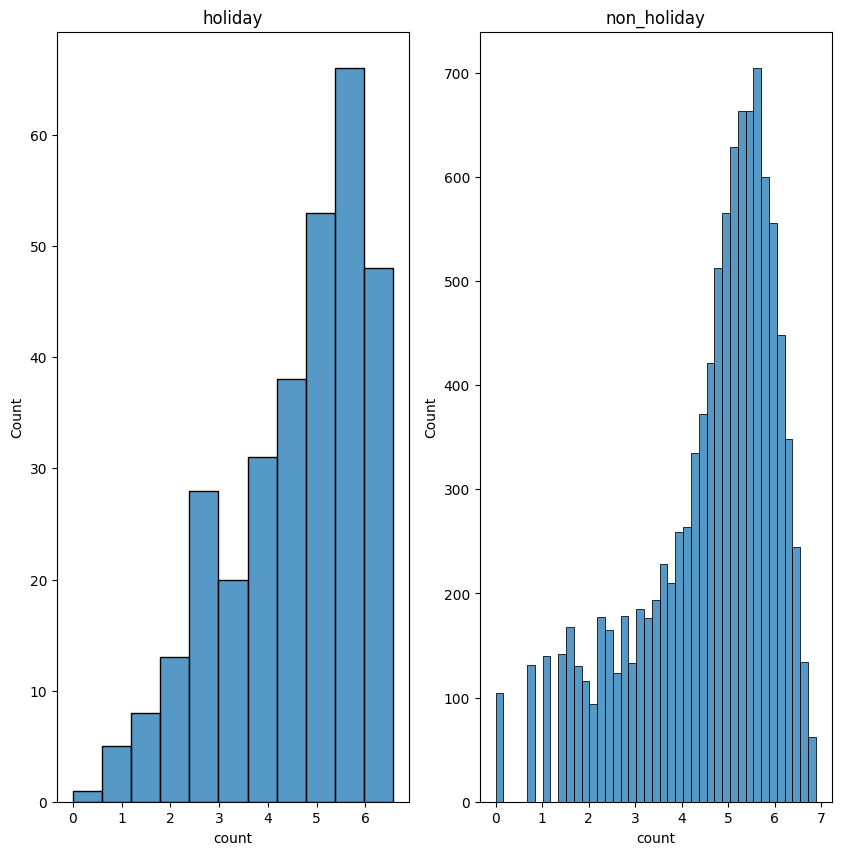

In [28]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('holiday')
sns.histplot(ax=axis[0],x=holiday_log)
axis[1].set_title('non_holiday')
sns.histplot(ax=axis[1],x=non_holiday_log)
plt.show()


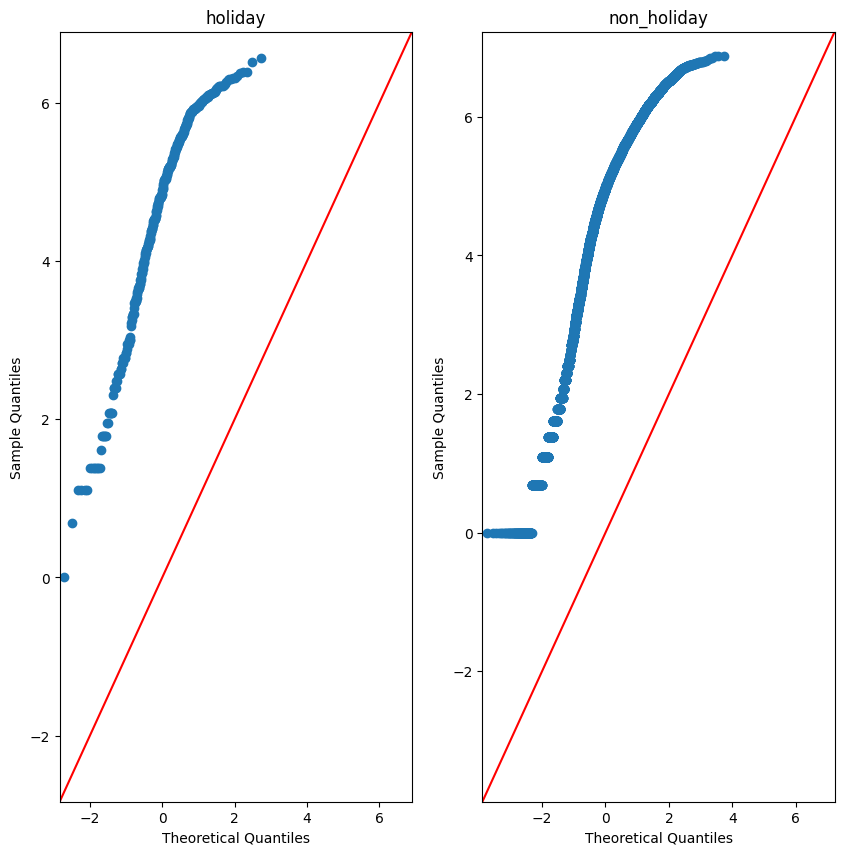

In [29]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('holiday')
sm.qqplot(holiday_log, line ='45',dist=normal_rv,ax=axis[0])
axis[1].set_title('non_holiday')
sm.qqplot(non_holiday_log, line ='45',dist=normal_rv,ax=axis[1])
plt.show()


From above analysis we can see holiday log count data is also not normally distributed so in this case ttest might give wrong result.

<h5>Lets test levene test to test the variance of all the samples</h5>

Null hypothysis: Holiday and Non_holiday has same variance<br>
Alternate hypothysis: Holiday and Non_holiday has different variance<br>
Let's test with 95% percent confidence interval<br>

In [30]:
stats,prob=levene(holiday,non_holiday)
print("levene statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. Holiday and Non_holiday has different variance")
else:
  print("Can not reject Null hypthysis. Holiday and Non_holiday has same variance")

levene statistice=  1.222306875221986e-06  Probability=  0.9991178954732041
Can not reject Null hypthysis. Holiday and Non_holiday has same variance


From levene test it is confirmed that variance of each holiday are same but as the data is not normally distributed ttest not able to give us right probabilty value.

<h3>Statistical Analysis</h3>

**Null hypothysis:** Holiday and Non_holiday has no impact on count<br>
**Alternate hypothysis:** Holiday and Non_holiday impacts on count<br>
Let's test with 95% percent confidence interval

In [31]:
stats,prob=ttest_ind(holiday,non_holiday)
print("t-statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. Holiday and Non_holiday impacts on count")
else:
  print("Can not reject Null hypthysis. Holiday and Non_holiday has no impact on count")

t-statistice=  -0.5626388963477119  Probability=  0.5736923883271103
Can not reject Null hypthysis. Holiday and Non_holiday has no impact on count


In [32]:
stats,prob=kruskal(holiday,non_holiday)
print("t-statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. Holiday and Non_holiday impacts on count")
else:
  print("Can not reject Null hypthysis. Holiday and Non_holiday has no impact on count")

t-statistice=  0.029065291413286558  Probability=  0.8646283697305994
Can not reject Null hypthysis. Holiday and Non_holiday has no impact on count


From the both statistical testing it is clear that **holiday does not impact on count of total rental bike**s with 95 % confidence.

<h1>Analysis of workingday</h1>

workingday is a categorical variable here with values neither weekend nor holiday is 1, otherwise is 0. So for statistical analysis we will use ttest.

<h3>Bivariate analysis with count</h3>

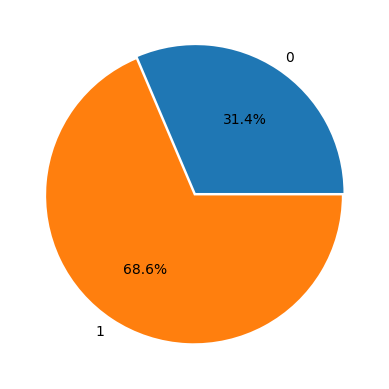

In [33]:
workingday_yulu=yulu.groupby(['workingday']).agg({'count':'sum'}).rename(columns={'count':'Count'}).reset_index()
plt.pie(workingday_yulu['Count'],explode=(0.01,0.01), labels=workingday_yulu['workingday'],autopct='%.1f%%')
plt.show()

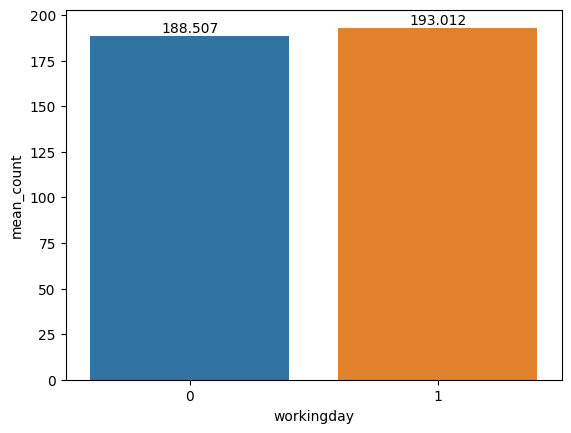

In [34]:
workingday_yulu_avg=yulu.groupby(['workingday']).agg({'count':'mean'}).rename(columns={'count':'mean_count'}).reset_index()
ax=sns.barplot(x=workingday_yulu_avg['workingday'],y=workingday_yulu_avg['mean_count'])
ax.bar_label(ax.containers[0])
plt.show()

From the analysisi we can see on an average workingday has slightly more count over non workingday but to confirm this insight we need to do statistical testing.

In [35]:
workingday=yulu[yulu['workingday']==1]['count']
non_workingday=yulu[yulu['workingday']==0]['count']


Assumptions for ttest:<br>
*   The samples are contous.<br>
*   The population standard deviations of the groups are all equal.<br>






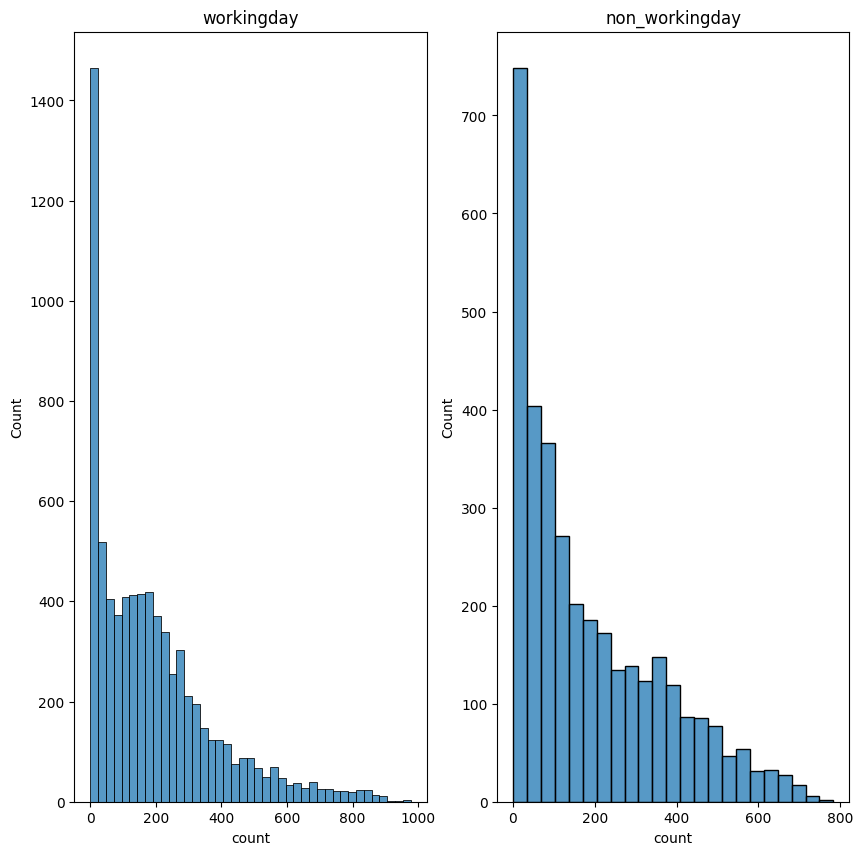

In [36]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('workingday')
sns.histplot(ax=axis[0],x=workingday)
axis[1].set_title('non_workingday')
sns.histplot(ax=axis[1],x=non_workingday)
plt.show()


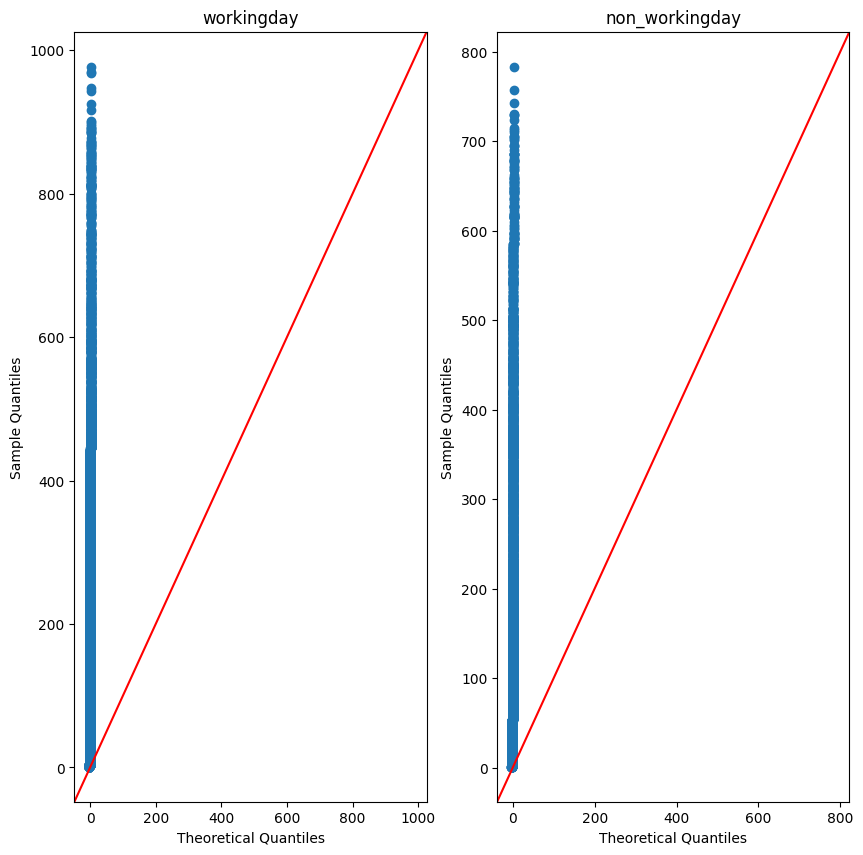

In [37]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('workingday')
sm.qqplot(workingday, line ='45',dist=normal_rv,ax=axis[0])
axis[1].set_title('non_workingday')
sm.qqplot(non_workingday, line ='45',dist=normal_rv,ax=axis[1])
plt.show()

From above analysis we can see workingday count data is not normally distributed so in this case ttest might give wrong result.

<h5>Lets try taking log</h5>

In [38]:
workingday_log=yulu[yulu['workingday']==1]['count'].apply(lambda x:np.log(x))
non_workingday_log=yulu[yulu['workingday']==0]['count'].apply(lambda x:np.log(x))


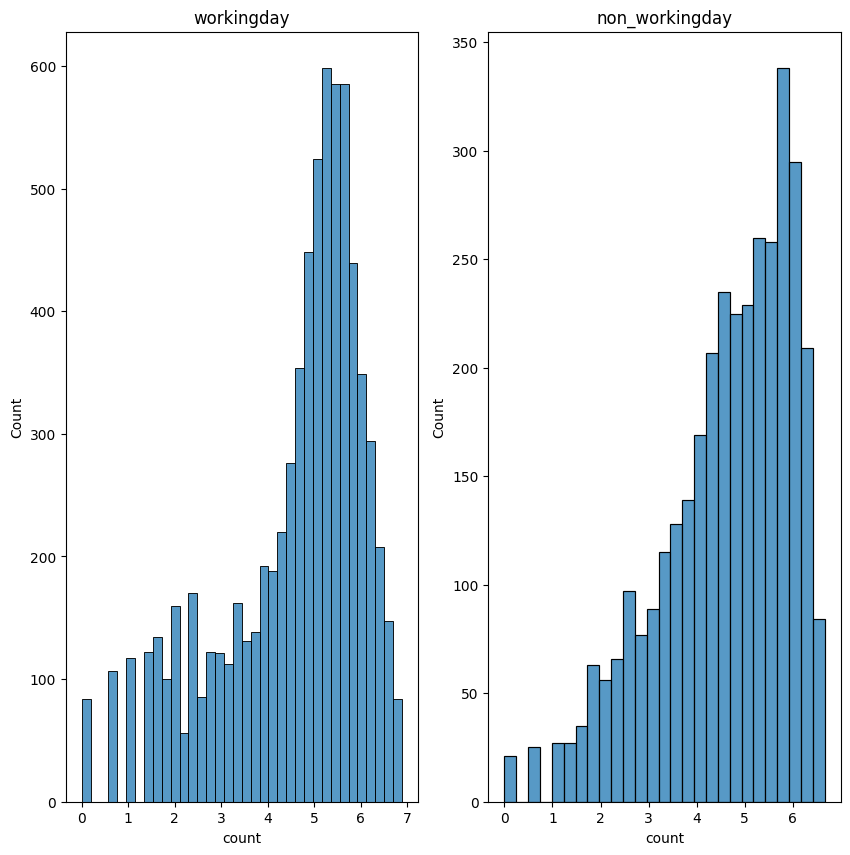

In [39]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('workingday')
sns.histplot(ax=axis[0],x=workingday_log)
axis[1].set_title('non_workingday')
sns.histplot(ax=axis[1],x=non_workingday_log)
plt.show()

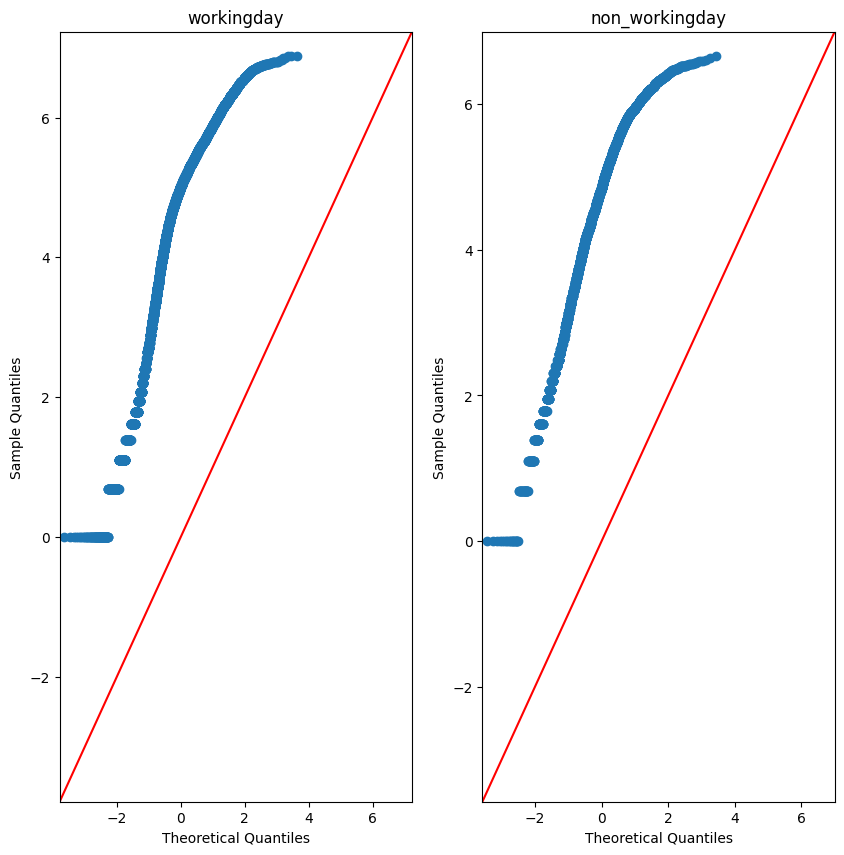

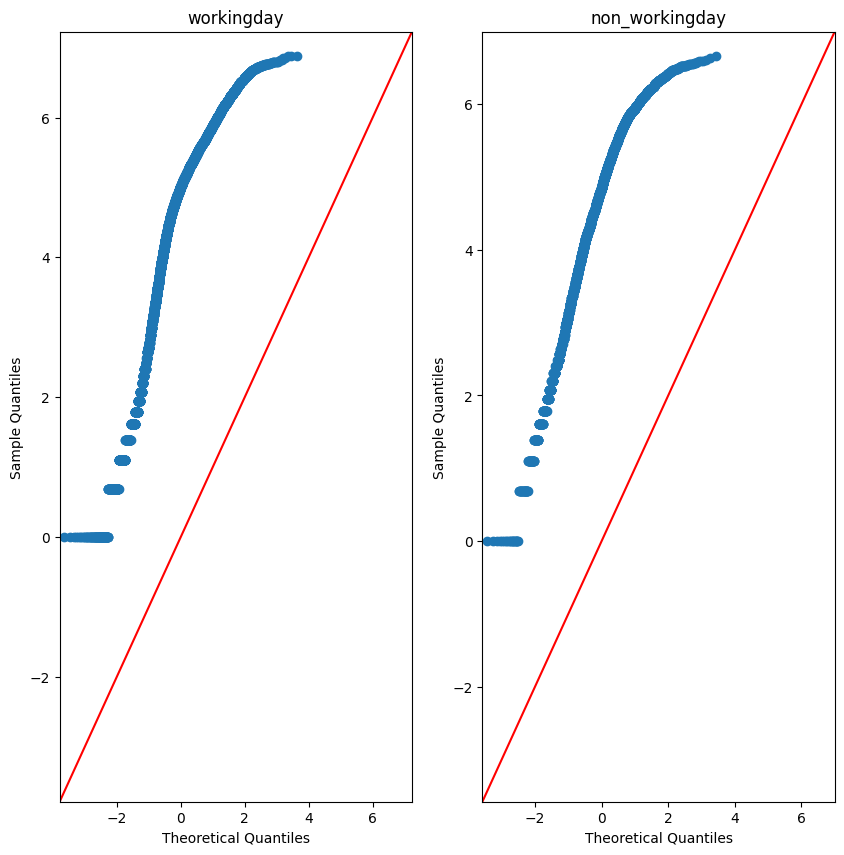

In [40]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0].set_title('workingday')
sm.qqplot(workingday_log, line ='45',dist=normal_rv,ax=axis[0])
axis[1].set_title('non_workingday')
sm.qqplot(non_workingday_log, line ='45',dist=normal_rv,ax=axis[1])


From above analysis we can see workingday log count data is also not normally distributed so in this case ttest might give wrong result.

<h5>Lets test levene test to test the variance of all the samples</h5>

Null hypothysis: workingday and Non_workingday has same variance<br>
Alternate hypothysis: workingday and Non_workingday has different variance<br>
Let's test with 95% percent confidence interval<br>

In [41]:
stats,prob=levene(workingday,non_workingday)
print("levene statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. workingday and Non_workingday has different variance")
else:
  print("Can not reject Null hypthysis. workingday and Non_workingday has same variance")

levene statistice=  0.004972848886504472  Probability=  0.9437823280916695
Can not reject Null hypthysis. workingday and Non_workingday has same variance


From levene test it is confirmed that variance of each workingday are same but as the data is not normally distributed ttest not able to give us right probabilty value.

<h3>Statistical Analysis</h3>

**Null hypothysis:** workingday and Non_workingday has no impact on count<br>
**Alternate hypothysis:** workingday and Non_workingday impacts on count<br>
Let's test with 95% percent confidence interval

In [42]:
stats,prob=ttest_ind(workingday,non_workingday)
print("t-statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. workingday and Non_workingday impacts on count")
else:
  print("Can not reject Null hypthysis. workingday and Non_workingday has no impact on count")

t-statistice=  1.2096277376026694  Probability=  0.22644804226361348
Can not reject Null hypthysis. workingday and Non_workingday has no impact on count


In [43]:
stats,prob=kruskal(workingday,non_workingday)
print("t-statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. workingday and Non_workingday impacts on count")
else:
  print("Can not reject Null hypthysis. workingday and Non_workingday has no impact on count")

t-statistice=  0.0016182887191034687  Probability=  0.9679113872727798
Can not reject Null hypthysis. workingday and Non_workingday has no impact on count


From the both statistical testing it is clear that **workingday does not impact on count of total rental bike**s with 95 % confidence.

<h1>Analysis of weather</h1>

weather is a categorical variable here with values bellow<br>
1: Clear, Few clouds, partly cloudy, partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
So for statistical analysis we will use Anova or kruiskal.

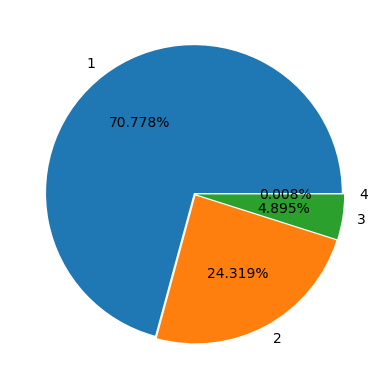

In [44]:
weather_yulu=yulu.groupby(['weather']).agg({'count':'sum'}).rename(columns={'count':'Count'}).reset_index()
plt.pie(weather_yulu['Count'],explode=(0.01,0.01,0.01,0.01), labels=weather_yulu['weather'],autopct='%.3f%%')
plt.show()

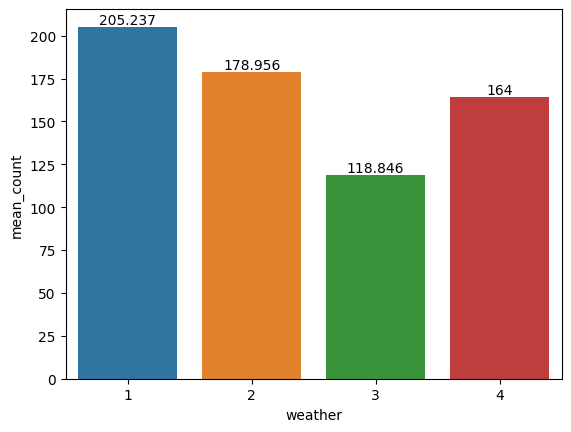

In [45]:
weather_yulu_avg=yulu.groupby(['weather']).agg({'count':'mean'}).rename(columns={'count':'mean_count'}).reset_index()
ax=sns.barplot(x=weather_yulu_avg['weather'],y=weather_yulu_avg['mean_count'])
ax.bar_label(ax.containers[0])
plt.show()

From the above analysis we can see on an average weather 1 has highest count of total rental bikes and 3rd weather has least count of total rental bikes. So it seems weather impacts count but to confirm this insight we need to do statistical testing.

In [46]:
weather_1=yulu[yulu['weather']==1]['count']
weather_2=yulu[yulu['weather']==2]['count']
weather_3=yulu[yulu['weather']==3]['count']
weather_4=yulu[yulu['weather']==4]['count']


Assumptions for Anova Test:
*   The samples are independent.
*   Each sample is from a normally distributed population.
*   The population standard deviations of the groups are all equal.






<h4>Let's Test the distribution of each weather</h4>

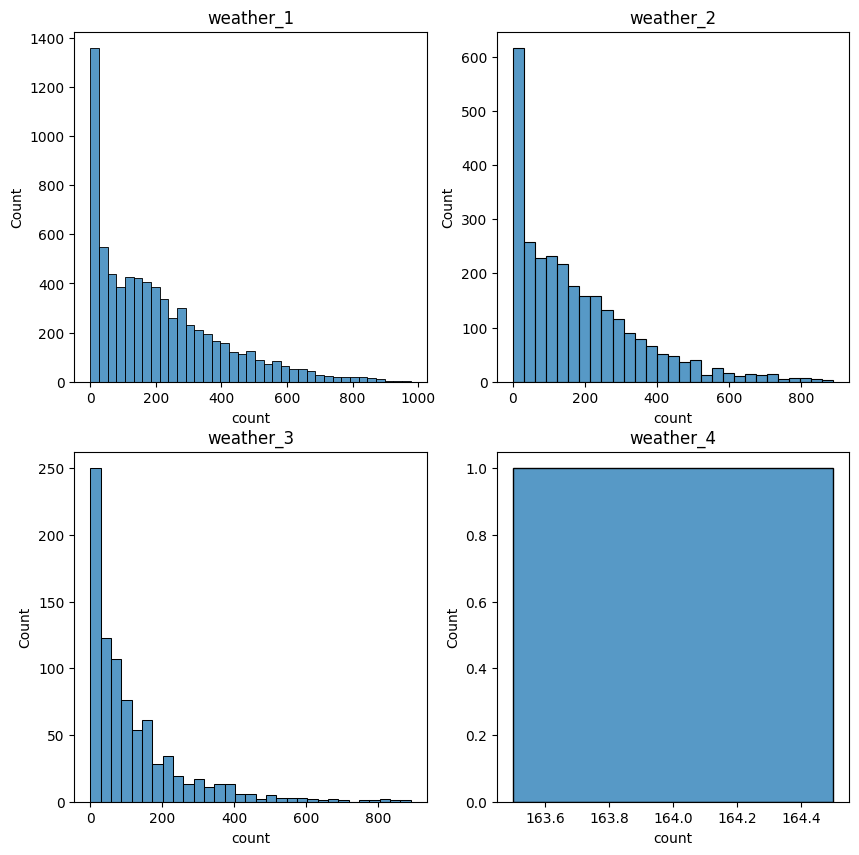

In [47]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('weather_1')
sns.histplot(ax=axis[0,0],x=weather_1)
axis[0,1].set_title('weather_2')
sns.histplot(ax=axis[0,1],x=weather_2)
axis[1,0].set_title('weather_3')
sns.histplot(ax=axis[1,0],x=weather_3)
axis[1,1].set_title('weather_4')
sns.histplot(ax=axis[1,1],x=weather_4)

plt.show()

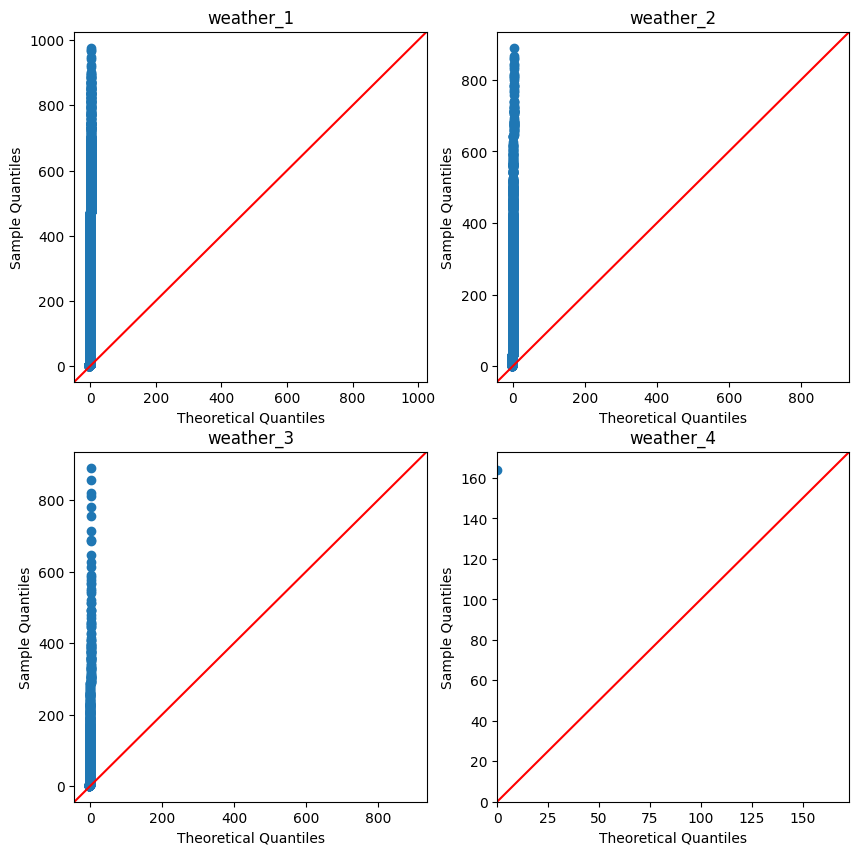

In [48]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('weather_1')
sm.qqplot(weather_1, line ='45',dist=normal_rv,ax=axis[0,0])
axis[0,1].set_title('weather_2')
sm.qqplot(weather_2, line ='45',dist=normal_rv,ax=axis[0,1])
axis[1,0].set_title('weather_3')
sm.qqplot(weather_3, line ='45',dist=normal_rv,ax=axis[1,0])
axis[1,1].set_title('weather_4')
sm.qqplot(weather_4, line ='45',dist=normal_rv,ax=axis[1,1])
plt.show()

From above analysis we can see weather count data is not normally distributed so in this case anova might give wrong result.

<h5>Lets try taking log<h5>

In [49]:
weather_1_log=yulu[yulu['weather']==1]['count'].apply(lambda x:np.log(x))
weather_2_log=yulu[yulu['weather']==2]['count'].apply(lambda x:np.log(x))
weather_3_log=yulu[yulu['weather']==3]['count'].apply(lambda x:np.log(x))
weather_4_log=yulu[yulu['weather']==4]['count'].apply(lambda x:np.log(x))

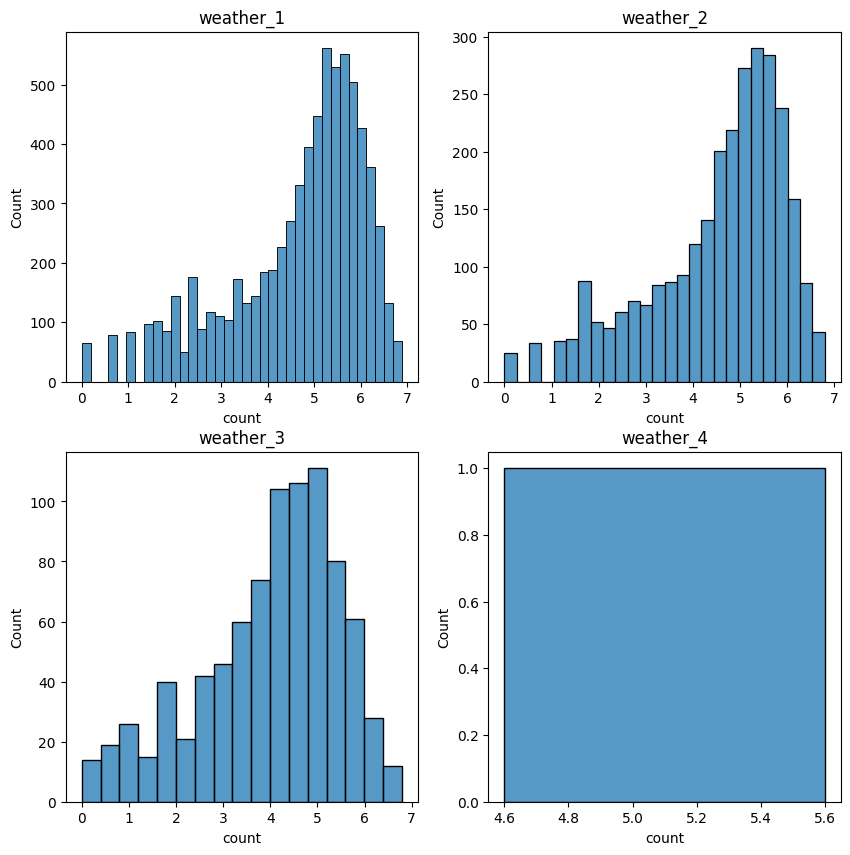

In [50]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('weather_1')
sns.histplot(ax=axis[0,0],x=weather_1_log)
axis[0,1].set_title('weather_2')
sns.histplot(ax=axis[0,1],x=weather_2_log)
axis[1,0].set_title('weather_3')
sns.histplot(ax=axis[1,0],x=weather_3_log)
axis[1,1].set_title('weather_4')
sns.histplot(ax=axis[1,1],x=weather_4_log)
plt.show()

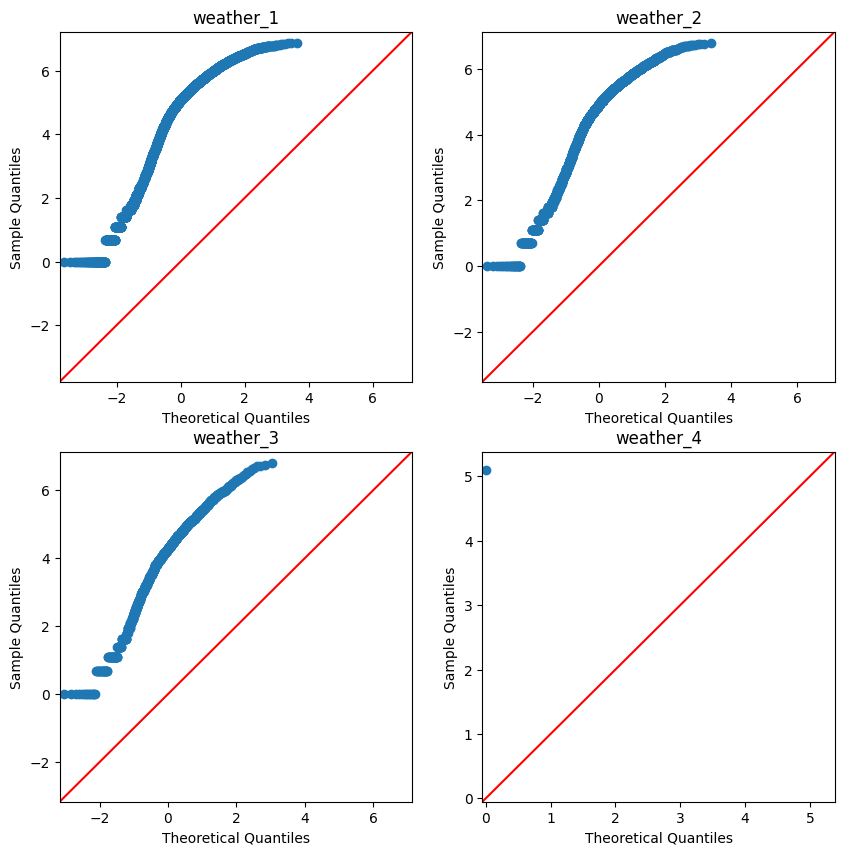

In [51]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)
axis[0,0].set_title('weather_1')
sm.qqplot(weather_1_log, line ='45',dist=normal_rv,ax=axis[0,0])
axis[0,1].set_title('weather_2')
sm.qqplot(weather_2_log, line ='45',dist=normal_rv,ax=axis[0,1])
axis[1,0].set_title('weather_3')
sm.qqplot(weather_3_log, line ='45',dist=normal_rv,ax=axis[1,0])
axis[1,1].set_title('weather_4')
sm.qqplot(weather_4_log, line ='45',dist=normal_rv,ax=axis[1,1])
plt.show()

From above analysis we can see weather log count data is also not normally distributed so in this case anova might give wrong result.

<h5>Lets test levene test to test the variance of all the samples</h5>

Null hypothysis: All weather has same variance<br>
Alternate hypothysis: All weather has different variance<br>
Let's test with 95% percent confidence interval<br>

In [52]:
stats,prob=levene(weather_1,weather_2,weather_3,weather_4)
print("levene statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. All weather has different variance")
else:
  print("Can not reject Null hypthysis. All weather has same variance")

levene statistice=  54.85106195954556  Probability=  3.504937946833238e-35
Reject Null hypthysis. All weather has different variance


From levene test it is confirmed that variance of each weather are not same so it is confirmed that anova not able to give us right probabilty value.

<h3>Statistical Analysis</h3>

**Null hypothysis:** weather has no impact on count<br>
**Alternate hypothysis:** weather impacts on count<br>
Let's test with 95% percent confidence interval

In [53]:
#anov test
stats,prob=f_oneway(weather_1,weather_2,weather_3,weather_4)
print("Anova statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. weather impacts on count")
else:
  print("Can not reject Null hypthysis. weather has no impact on count")

Anova statistice=  65.53024112793271  Probability=  5.482069475935669e-42
Reject Null hypthysis. weather impacts on count


In [54]:
#kruskal test
stats,prob=kruskal(weather_1,weather_2,weather_3,weather_4)
print("Anova statistice= ",stats," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. weather impacts on count")
else:
  print("Can not reject Null hypthysis. weather has no impact on count")

Anova statistice=  205.00216514479087  Probability=  3.501611300708679e-44
Reject Null hypthysis. weather impacts on count


From the both statistical testing it is clear that **weather does impact on count of total rental bikes** with 95 % confidence.

<h1>Lets test dependency of weather on season</h1>

In [55]:
pd.crosstab(index=yulu['weather'],columns=yulu['season'],margins=True)

season,1,2,3,4,All
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
All,2686,2733,2733,2734,10886


In [56]:
weather_seasion=pd.crosstab(index=yulu['weather'],columns=yulu['season'])

In [57]:
weather_seasion

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


Here we can see 4th weather has very less data point which can impact our analysis

**Null hypothysis:** weather is not dependend on season<br>
**Alternate hypothysis:** weather is dependend on season<br>
Let's test with 95% percent confidence interval

In [58]:
chi2_stat,prob,dof,expected_freq=chi2_contingency(weather_seasion)
print("chi2 statistice= ",chi2_stat," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. weather is dependend on season")
else:
  print("Can not reject Null hypthysis. weather is not dependend on season")

chi2 statistice=  49.15865559689363  Probability=  1.5499250736864862e-07
Reject Null hypthysis. weather is dependend on season


Let's test with out rth weather

In [59]:
chi2_stat,prob,dof,expected_freq=chi2_contingency(weather_seasion[:-1])
print("chi2 statistice= ",chi2_stat," Probability= ",prob)
if prob<0.05:
  print("Reject Null hypthysis. weather is dependend on season")
else:
  print("Can not reject Null hypthysis. weather is not dependend on season")

chi2 statistice=  46.101457310732485  Probability=  2.8260014509929403e-08
Reject Null hypthysis. weather is dependend on season


From the analysis we can conclude season is dependent on season

<h1>Let's analyse numerical columns and their corelation with count variable</h1>

<h2>Analysis of temp</h2>

In [60]:
yulu['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

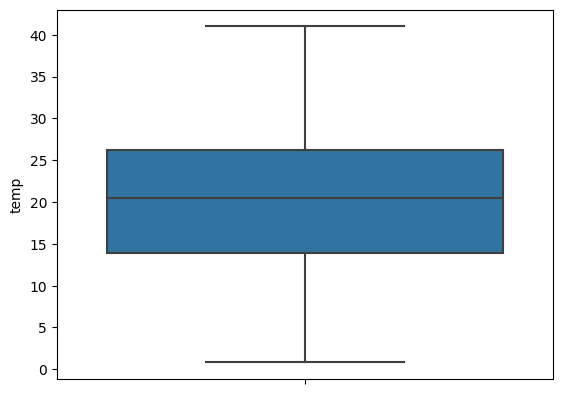

In [61]:
sns.boxplot(y=yulu['temp'])
plt.show()

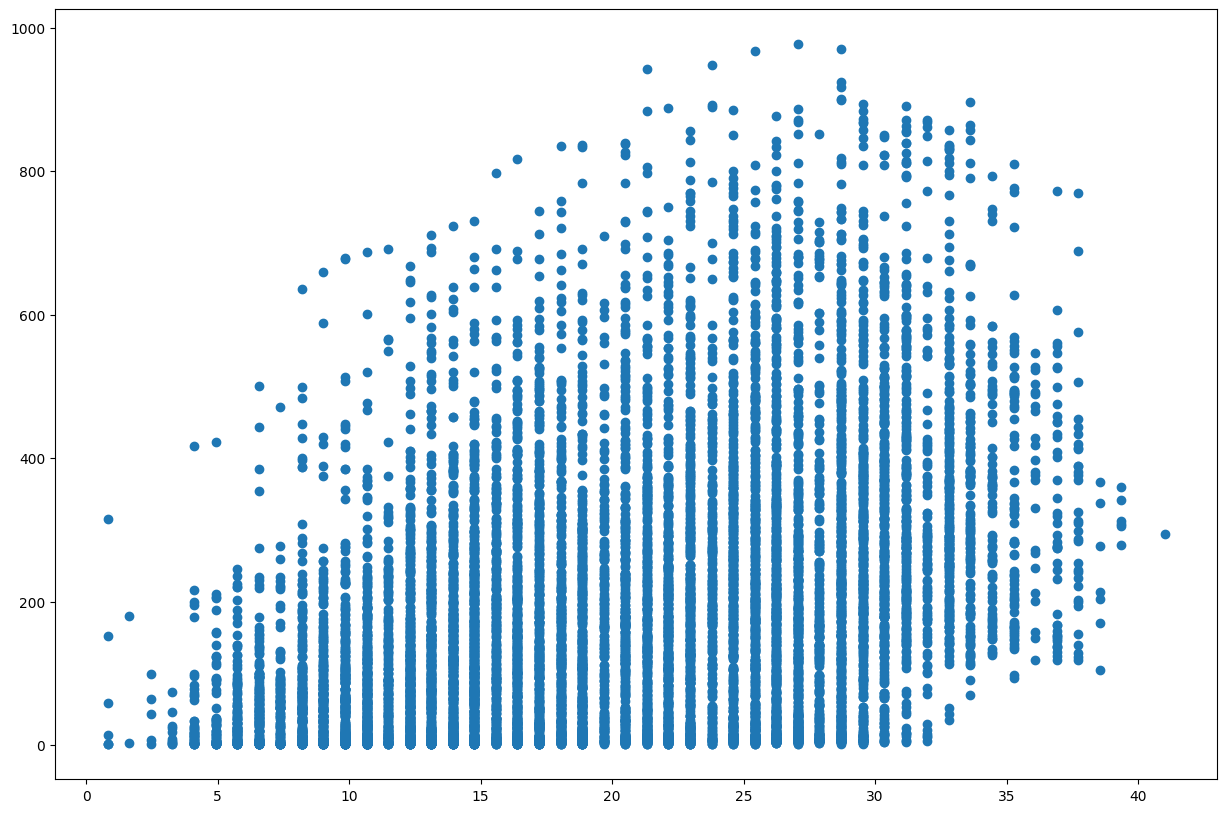

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(x=yulu['temp'],y=yulu['count'])
plt.show()

From the above analysis we could not found any corelation of count of total rental bikes with temperature

In [63]:
temp_count_corr=yulu[['temp','count']].corr()
temp_count_corr

,temp,count
temp,1.000000,0.394454
count,0.394454,1.000000


From the above data we can see correlation coefficient value is 0.39 which is very less. So temperature and count has no correlation.

<h2>Analysis of atemp</h2>

In [64]:
yulu['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

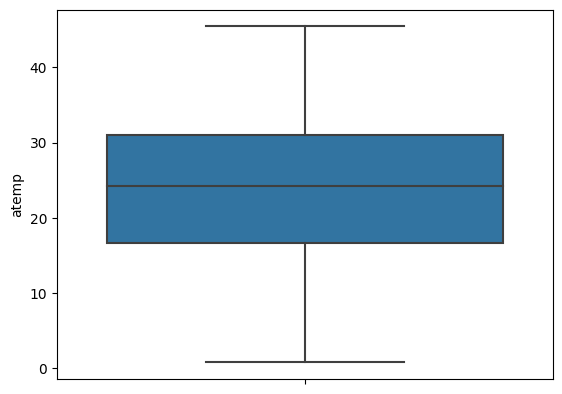

In [65]:
sns.boxplot(y=yulu['atemp'])
plt.show()

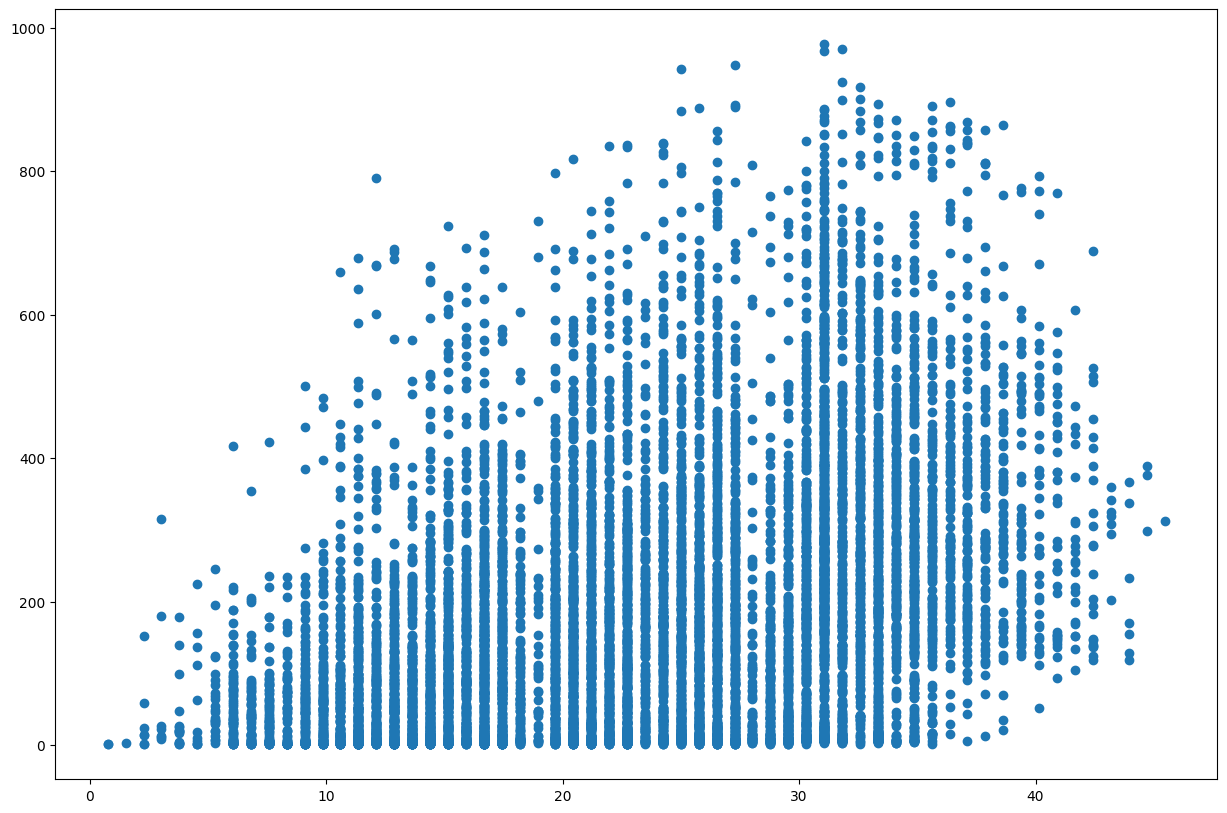

In [66]:
plt.figure(figsize=(15,10))
plt.scatter(x=yulu['atemp'],y=yulu['count'])
plt.show()

From the above analysis we could not found any corelation of count of total rental bikes with feeling temperature.

In [67]:
atemp_count_corr=yulu[['atemp','count']].corr()
atemp_count_corr

,atemp,count
atemp,1.000000,0.389784
count,0.389784,1.000000


From the above data we can see correlation coefficient value is 0.389 which is very less. So feeling temperature and count has no correlation.

<h2> Lets analyse is atemp is dependent on temp</h2>

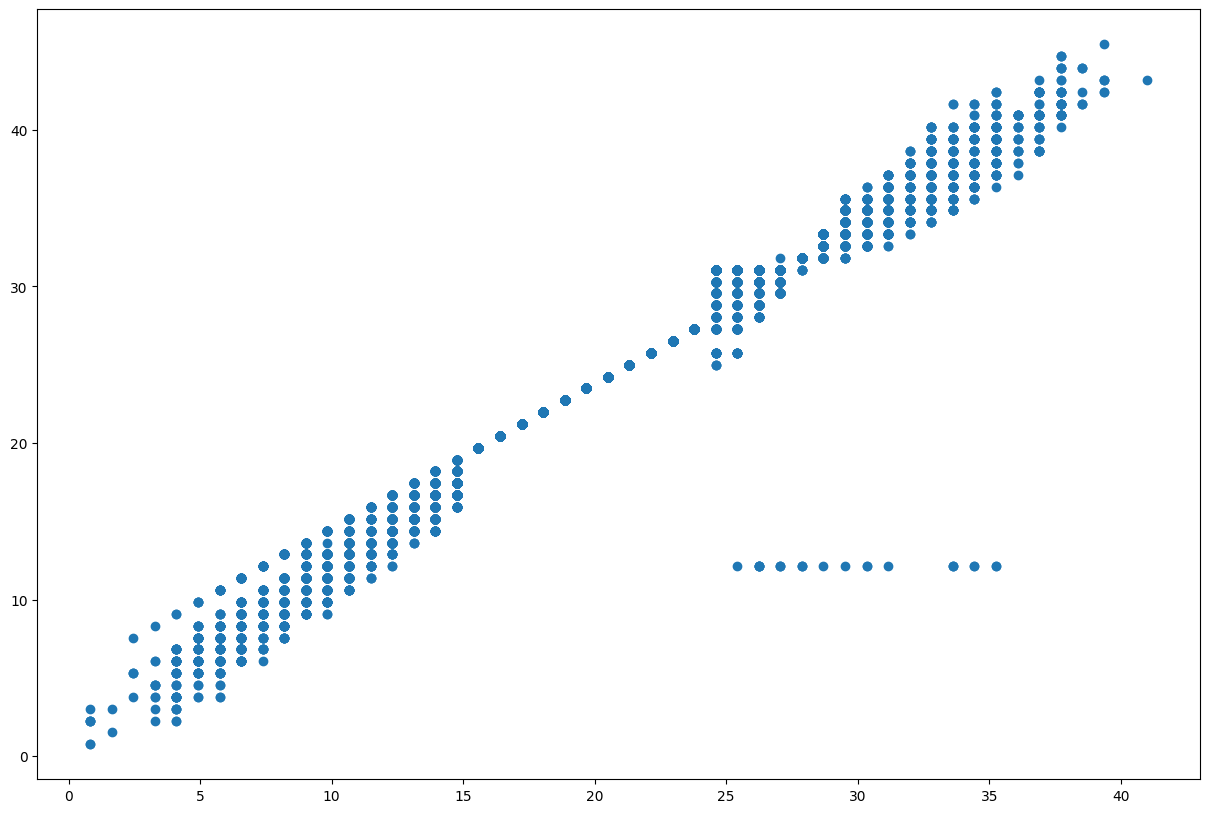

In [68]:
plt.figure(figsize=(15,10))
plt.scatter(x=yulu['temp'],y=yulu['atemp'])
plt.show()

In [69]:
temp_atemp_corr=yulu[['atemp','temp']].corr()
temp_atemp_corr

,atemp,temp
atemp,1.000000,0.984948
temp,0.984948,1.000000


From the analysis we can conclude feeling temperature and temperature is correlated as they have very high correlation coefficient of 0.98.

<h2>Analysis of humidity</h2>

In [70]:
yulu['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

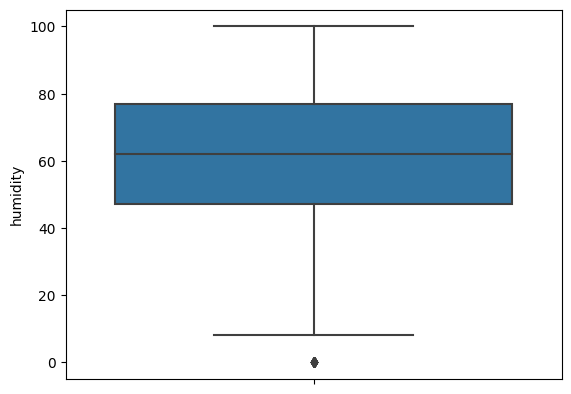

In [71]:
sns.boxplot(y=yulu['humidity'])
plt.show()

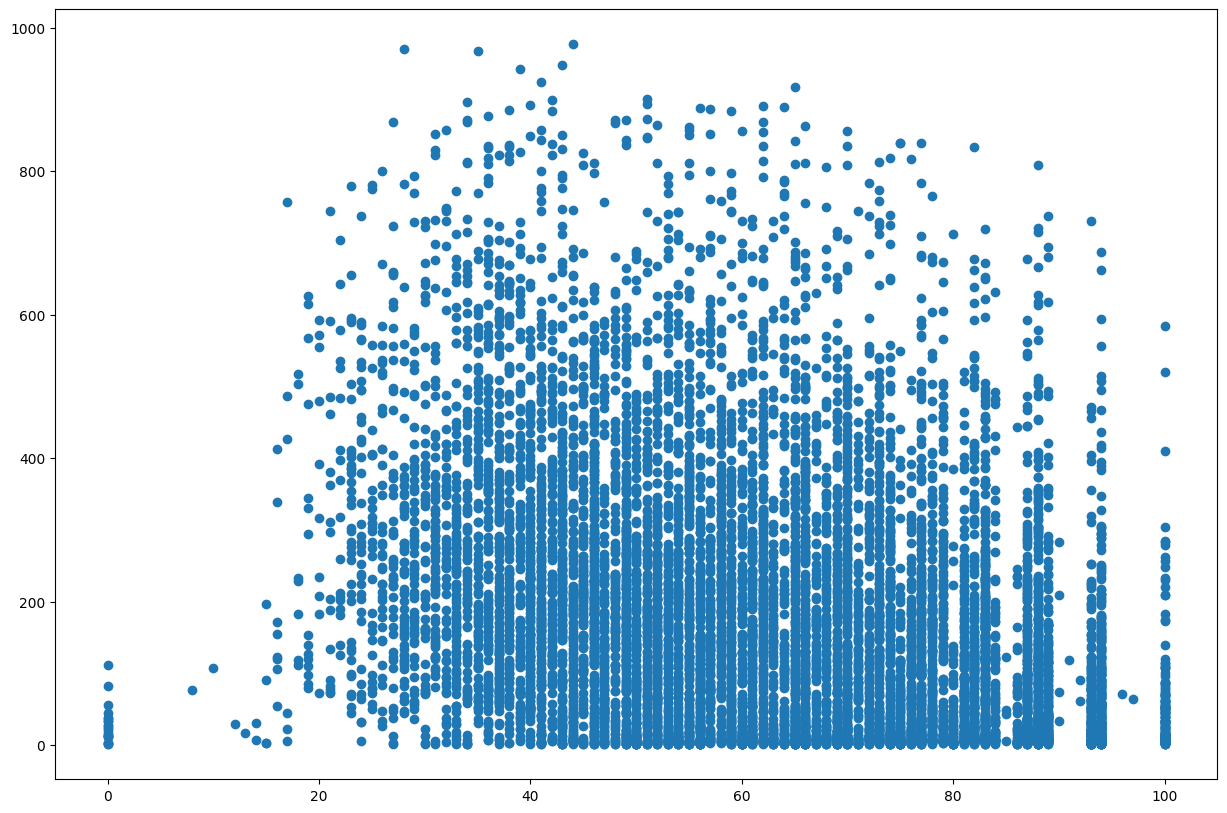

In [72]:
plt.figure(figsize=(15,10))
plt.scatter(x=yulu['humidity'],y=yulu['count'])
plt.show()

From the above analysis we could not found any corelation of count of total rental bikes with humidity.

In [73]:
humidity_count_corr=yulu[['humidity','count']].corr()
humidity_count_corr

,humidity,count
humidity,1.000000,-0.317371
count,-0.317371,1.000000


From the above data we can see correlation coefficient value is -0.317 which is very less. So humidity and count has no correlation.

<h2> Lets analyse is atemp is dependent on humidity</h2>

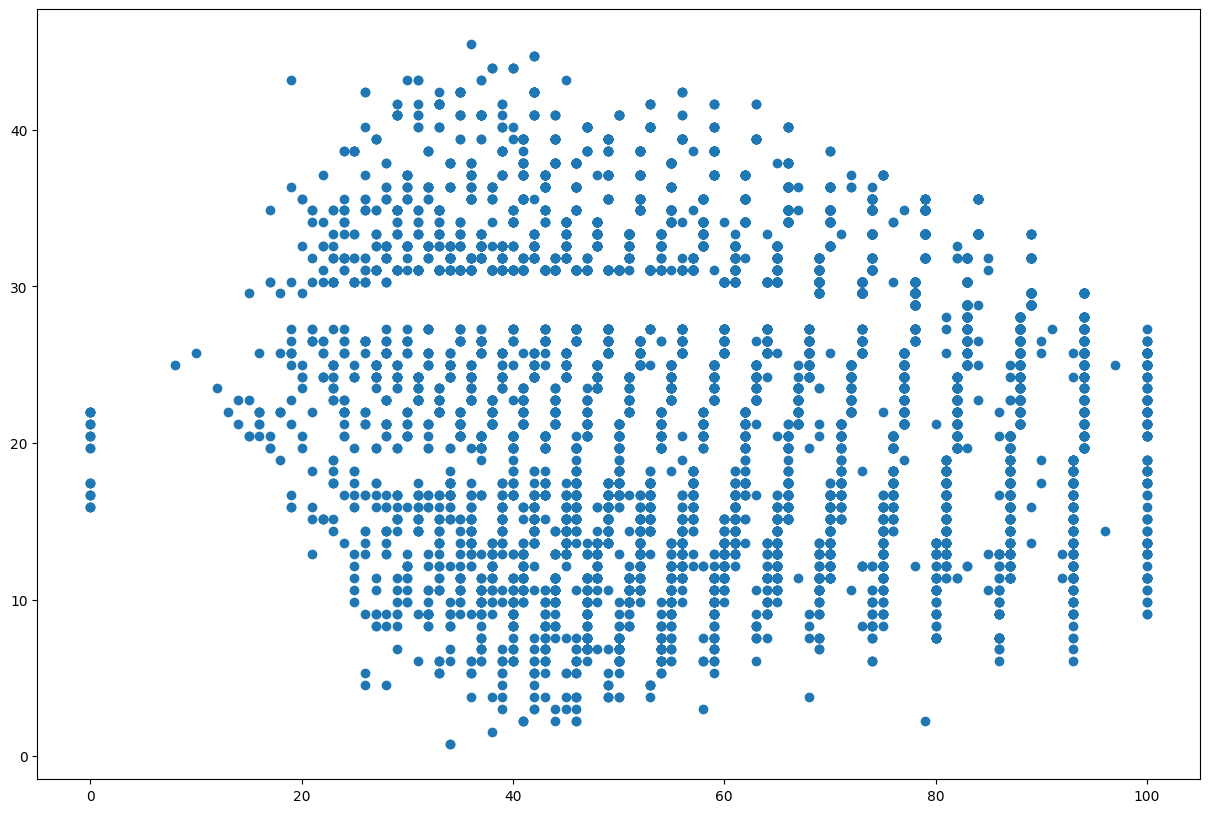

In [74]:
plt.figure(figsize=(15,10))
plt.scatter(x=yulu['humidity'],y=yulu['atemp'])
plt.show()

In [75]:
humidity_atemp_corr=yulu[['atemp','humidity']].corr()
humidity_atemp_corr

,atemp,humidity
atemp,1.000000,-0.043536
humidity,-0.043536,1.000000


From the analysis we can conclude feeling temperature and temperature is notcorrelated as they have very low correlation coefficient of -0.043.

<h2>Analysis of windspeed</h2>

In [76]:
yulu['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

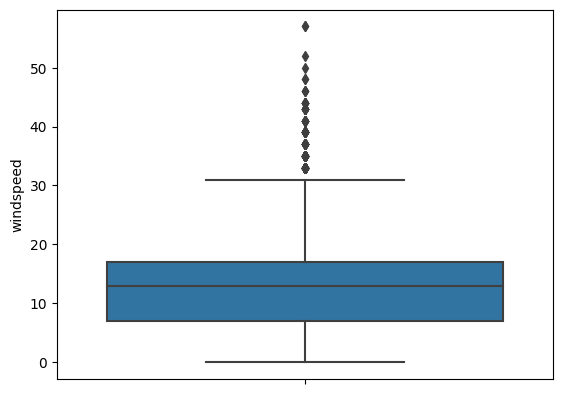

In [77]:
sns.boxplot(y=yulu['windspeed'])
plt.show()

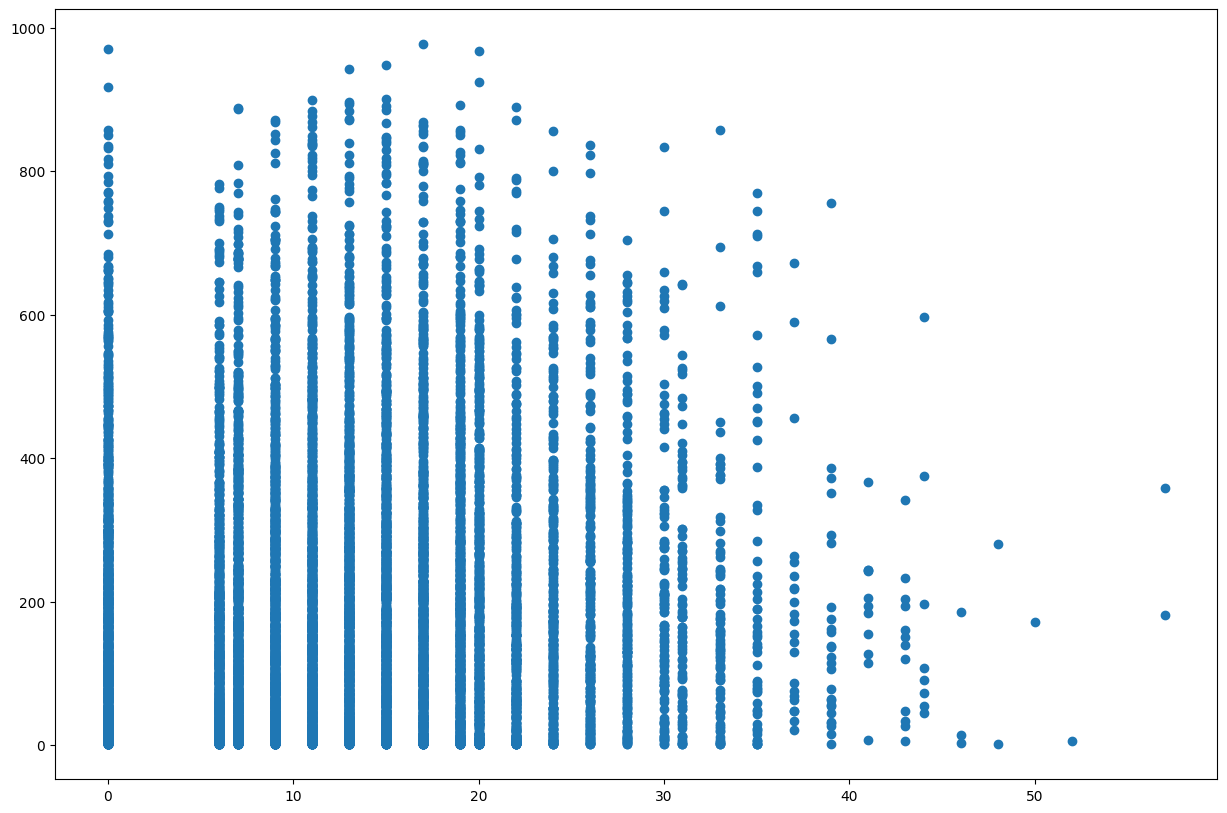

In [78]:
plt.figure(figsize=(15,10))
plt.scatter(x=yulu['windspeed'],y=yulu['count'])
plt.show()

From the above analysis we could not found any corelation of count of total rental bikes with windspeed.

In [79]:
windspeed_count_corr=yulu[['windspeed','count']].corr()
windspeed_count_corr

,windspeed,count
windspeed,1.000000,0.101369
count,0.101369,1.000000


From the above data we can see correlation coefficient value is 0.10 which is very less. So temperature and count has no correlation.

<h1>Inference from the analysis</h1>

From the above analysis we can conclude:


1.   Only **weather** and **season** impacts the count of total rental bikes with 95 % percent confidence.
2.   Weather depends on season.
3.   count of total rental bikes is not dependent on rest of the features given in the data set.




